# LOGISTIC REGRESSION

### Logistic regression is a method used to predict a dependent variable, given a set of independent variables, such that the dependent variable is categorical.
### Dependent variables (Y): The response binary variable holding values like 0 or 1, Yes or No.
### Independent variable (X): The predictor variable used to predict the response variable.

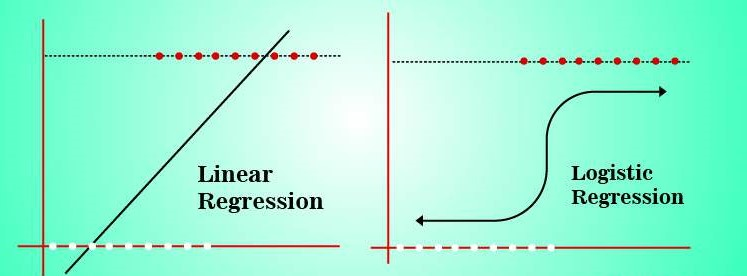

# Social Network Ads - Case Study
Our dataset contains some information about all of our users in the social network, including their User ID, Gender, Age, and Estimated Salary. The last column of the dataset is a vector of booleans describing whether or not each individual ended up clicking on the advertisement (0 = False, 1 = True). Let's import the relevant libraries, the dataset, and establish which variables are either dependent or independent

In the given ‘Social_Network_Ads’, predict which customers are more likely to purchase Social Network Ads.
Here, the dependent variable is ‘Purchased’ where 1 = Customer has purchased the Social Network Ad and 0 = Customer has not purchased the Social Network Ad.

### Importing libraries

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing

In [71]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\03LOGISTIC_REGRESSION\Case2')
os.getcwd()

'G:\\Ivy Pro Data Science, AI and Machine L\\PYTHON\\03LOGISTIC_REGRESSION\\Case2'

### Import dataset

In [72]:
df = pd.read_csv('Social_Network_Ads.csv')

In [73]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Basic EDA

In [74]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [76]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


* Here the maximum Age of customer is 60 and min is 18 years
* Over here we can see that the maximum estimated salary for customer is 150000 and minimum is 15000

In [77]:
# descriptive statistics for both numerical and categorical variables
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [78]:
# Here User ID is not suitable to predict the results and does not affect their decision to click or not click on the advertisement.
# so we will drop the varibles User ID.

In [79]:
df.drop(['User ID'], axis =1, inplace =True)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


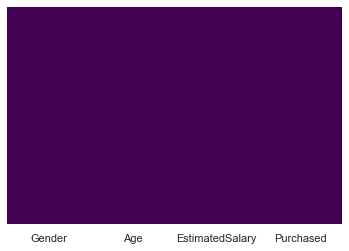

In [80]:
#checking for null values
print(df.isnull().sum())

# to see missing value using visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Exploratory Data Analysis

#### Dependent variable distribution --> Purchased

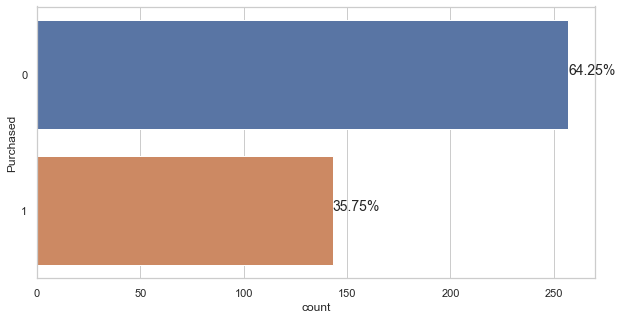

In [81]:
# Here We Check The Total No. Who Purchased or Not Purchased

plt.figure(figsize=(10,5))
plt.rc("font", size=14)
ax = sns.countplot(y ='Purchased',data=df)
total = len(df['Purchased'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.rc("font", size=14)
plt.show()

* Over here we see that customers who have Purchased the social network ads is 35.75% and who have not purchased is 64.25%

In [82]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

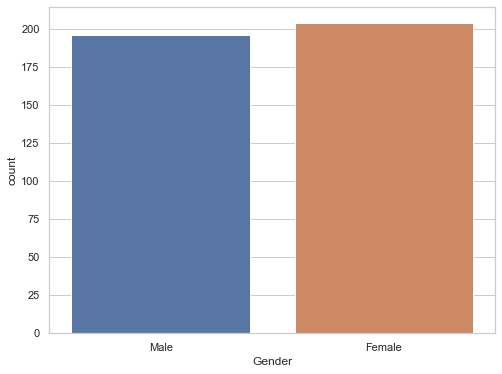

In [83]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = df)
plt.show()

* As We see here mostly female's like to buy social network ads then male's

In [84]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

### Bi-variate Analysis
For Continuous Vs Categorical columns
* Boxplots
* Violinplots

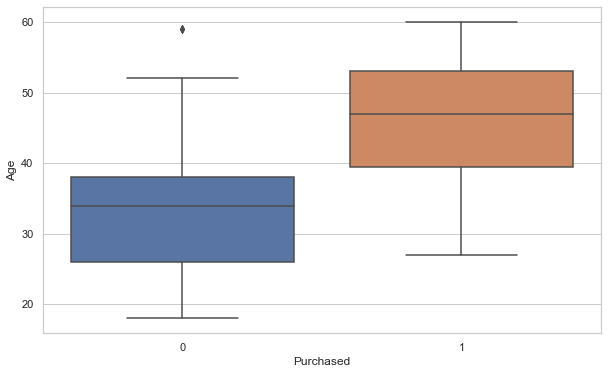

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Purchased", y = 'Age', data = df)
plt.show()

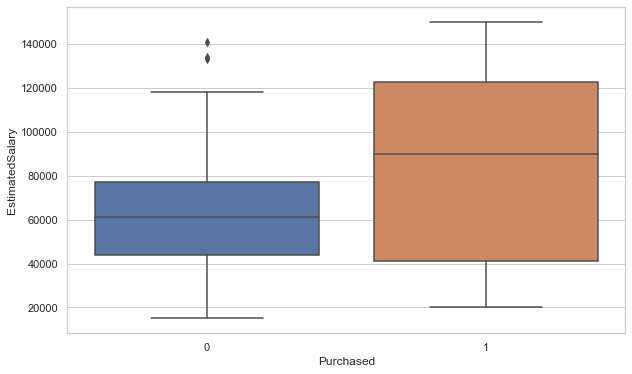

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Purchased", y = 'EstimatedSalary', data = df)
plt.show()

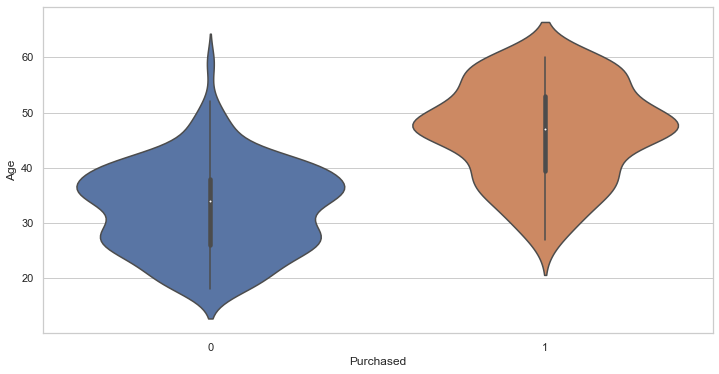

In [87]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Purchased", y='Age', data=df)
plt.show()

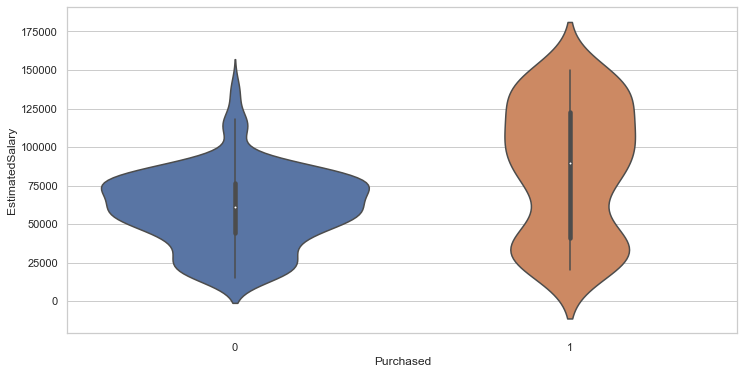

In [88]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Purchased", y='EstimatedSalary', data=df)
plt.show()

### Mutivariate Analysis
Pairplot

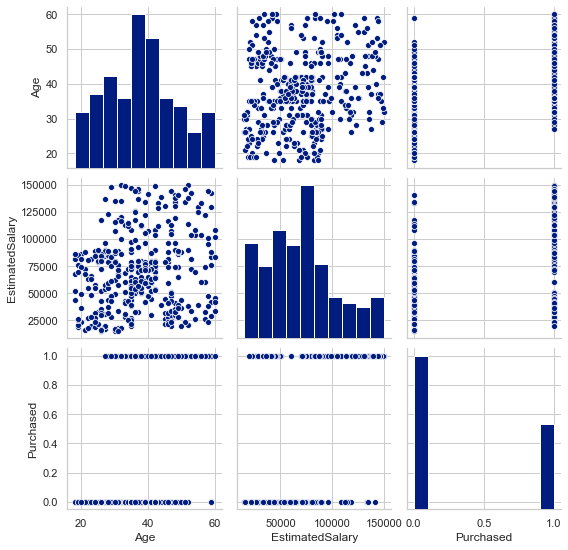

In [67]:
# Let's look at the pairplot for numerical variables
sns.set_palette("dark")
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

### Correlation 

In [21]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


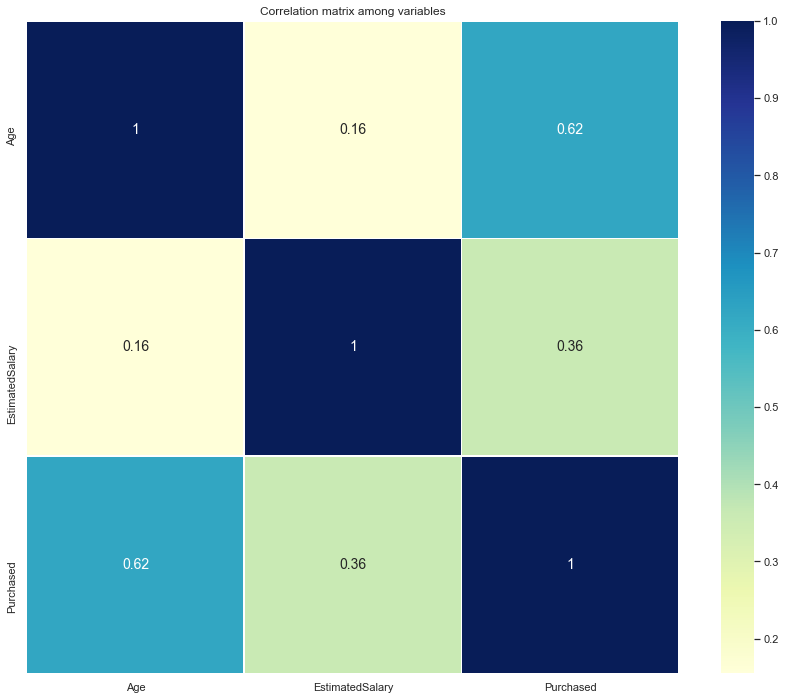

In [22]:
# Heatmap for Continuous variables
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Correlation matrix among variables")
plt.show()

### Feature Engineering

In [23]:
# creating dummies for categorical variables
X_Dummies = pd.get_dummies(df[['Gender']])

In [24]:
X_Dummies.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [25]:
df = df.drop(['Gender'],axis=1)

In [26]:
# merging both dummies data for categorical var and the original data using pd.concat
df2 = pd.concat([df,X_Dummies],axis=1)

In [27]:
df2.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


### Creating the Independendent and Dependent Data Sets

In [28]:
X = df2.drop(['Purchased'], axis =1)

In [29]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [30]:
y = df2['Purchased']

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Logistic Model Building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Standarisation of data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [37]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

### Prediction of the Model

In [38]:
y_pred = classifier.predict(X_test_scaled)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [41]:
confusion_matrix

array([[74,  5],
       [ 8, 33]], dtype=int64)

#### Confusion matrix

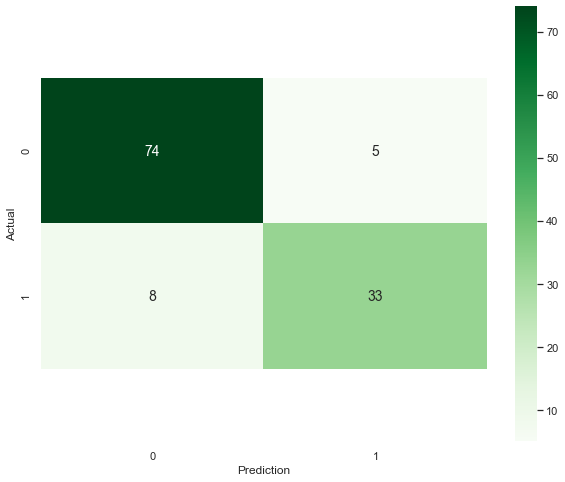

In [42]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [43]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120

Accuracy of logistic regression classifier on test set: 0.89


### ROC AUC CURVE
The Receiver Operating Characteristics (ROC) Curve. 

ROC curve plots the true positive rate against false positive rate

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

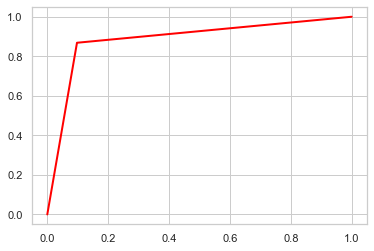

In [45]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(classifier.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [50]:
print('Roc Auc Score of logistic regression classifier: {:.2f}'.format(roc_auc_score(classifier.predict(X_test_scaled),y_test)))

Roc Auc Score of logistic regression classifier: 0.89


# RANDOM FOREST 

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [52]:
rfc_pred = rfc.predict(X_test_scaled)

In [53]:
rfc_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [55]:
cm

array([[74,  5],
       [ 5, 36]], dtype=int64)

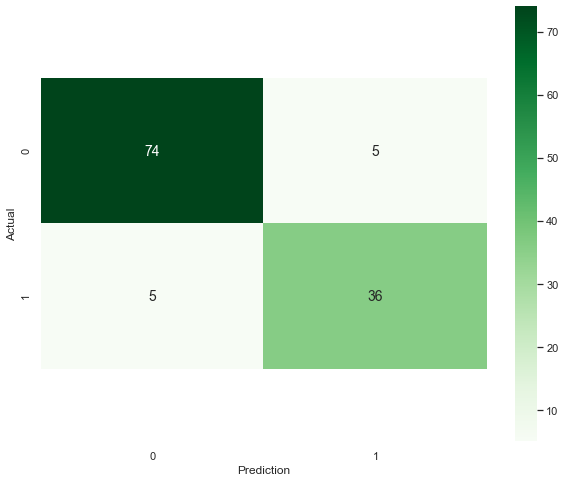

In [92]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Greens', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [57]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rfc.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        79
           1       0.88      0.88      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

Accuracy of logistic regression classifier on test set: 0.92


### If we compare logistic regression model with random forest, the accurcay and f1-score is coming much better than logistic model.
### We can say that Random forest model is better approach.